In [2]:
"""Loads an arbitrary number of .csv files (numbers of rows don't beed to be the same) into numpy array. 
Then plots the data. N.B. This will be slow for large files, as it has to evaluate each element in the .csv file
to convert it to a float. There maybe a more efficient way of doing it with numpy.loadtxt or equivalent.
"""
%matplotlib notebook
import os
from os import listdir
import pylab
from scipy import *
import numpy as np
import matplotlib.pyplot as plt
import csv
import glob

path = "F:\MY FILES\Work\Coding\Example code\Load csv data" #apth where data are (.csv format)

Njunkrows=3 #No. of rows to be removed from data files (delete text or titles etc from data)

# Load data

In [14]:
extension = 'csv'
os.chdir(path)
fnames = [i for i in glob.glob('*.{}'.format(extension))]
print("Filenames found in path are:  ",fnames)

datalist=[]
for i in range(len(fnames)):
    with open(fnames[i], 'rb') as f:
        reader = csv.reader(f)
        data = list(reader)
        datalist.append(data)  #datalist contains data from all csv files

## Place data into a numpy array for plotting
NdatPts=[]
for i in range(len(fnames)):
    NdatPts.append(int(shape(datalist[i])[0])-Njunkrows)

datalistMat=np.zeros((max(NdatPts),2,len(fnames)))  #Fragile - assumes data all have same length
xdata=[]
for i in range(len(fnames)):  
    datalist[i]=datalist[i][Njunkrows:] #Remove titles of columns
    for j in range(len(datalist[i])):
        datalistMat[j,0,i]=eval(datalist[i][j][0]) #Convert from string to float. Frequencies
        datalistMat[j,1,i]=eval(datalist[i][j][1]) #Convert from string to float. S11 values

('Filenames found in path are:  ', ['LFV1_IN_CRYO_MAX_CAP.CSV', 'LFV1_IN_CRYO_MIN_CAP.CSV', 'LFV1_IN_CRYO_VAC_MAX_CAP_DETAIL.CSV', 'LFV1_IN_CRYO_VAC_MIN_CAP.CSV', 'LFV1_IN_CRYO_VAC_MIN_CAP_DETAIL.CSV', 'LFV1_ON_LID_MAX_CAP.CSV', 'LFV1_ON_LID_MIN_CAP.CSV'])


# Plotting

<IPython.core.display.Javascript object>


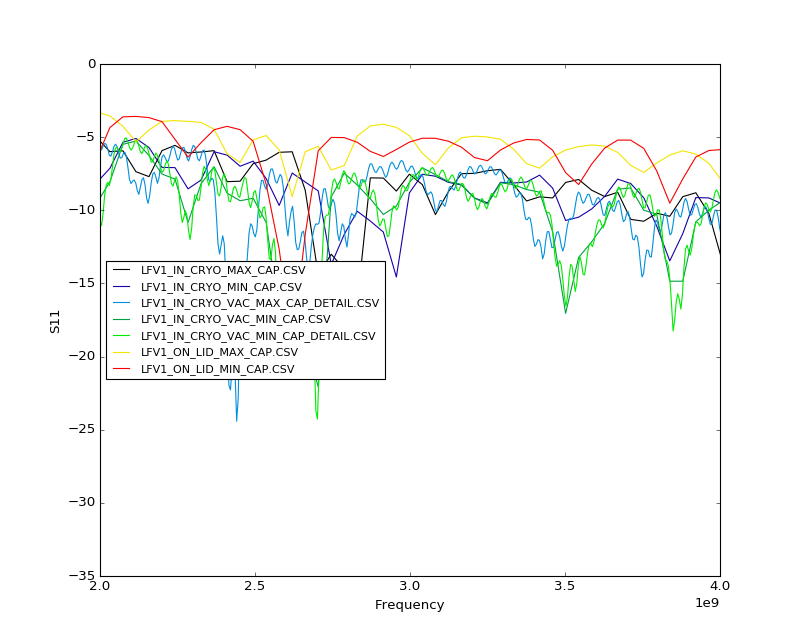

In [15]:
Nplots=len(fnames)

import matplotlib.colors as colors
import matplotlib.cm as cmx
jet = plt.get_cmap('spectral') 
cNorm  = colors.Normalize(vmin=0, vmax=Nplots)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

fig, (ax1) = plt.subplots(1, 1, figsize=[10,8]) # one row, two columns
LabelList=[]
offset=0
for DataSet in range(0,Nplots,1):
    colorVal = scalarMap.to_rgba(DataSet)
    ax1.plot(datalistMat[0:NdatPts[DataSet],0,DataSet], datalistMat[0:NdatPts[DataSet],1,DataSet], color=colorVal)
    LabelList.append("%s" %(fnames[DataSet]))
    #offset=offset+yOffsetStep    

ax1.set_xlabel('Frequency')
ax1.set_ylabel('S11')
ax1.set_xlim(2e9, 4e9)
ax1.legend(LabelList,loc='center left', fontsize=10, title="")
#ax1.set_ylim(-10, offset+200)

